In [1]:
#load modules
import OL18
import numpy as np
import pylab as pl
import cgsconst as cgs

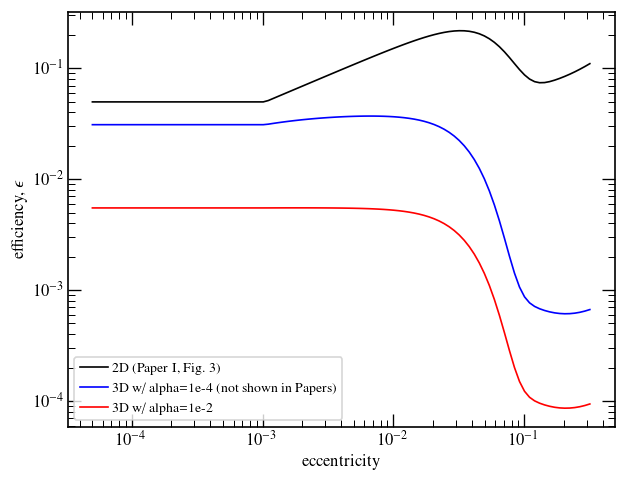

In [2]:
#Figure 3 of LO18

Npt = 100
eccarr = 10**(np.linspace(-4.3,-0.5,Npt))

#MODE is a string that consist of:
# [2d,3d,]    :2d (planar) limit, 3d limit; (default:both -- if nothing is given)
# [f,]        :inclusion of fset modulation factor (default: not)
# [set,bal,]  :settling only; ballistic only; (default: both)

#mode='2df': 2D limit, including f_set effects (suppresses P.A. at high velocity)
#mode='': general (all effects)

eps2dFig3 = OL18.epsilon (ep=eccarr, tau=1e-2, qp=3e-7, eta=1e-3, Rp=2.4e-5, mode='2df')
#you can play with the parameters like alphaz to see when the 2D limit is reached.
epsa4Fig3 = OL18.epsilon (ep=eccarr, tau=1e-2, qp=3e-7, eta=1e-3, hgas=0.03, alphaz=1e-4, Rp=2.4e-5)
epsa2Fig3 = OL18.epsilon (ep=eccarr, tau=1e-2, qp=3e-7, eta=1e-3, hgas=0.03, alphaz=1e-2, Rp=2.4e-5)

fg, ax = pl.subplots(dpi=120)
fg.subplots_adjust(left=0.12, right=0.88, wspace=0.0, hspace=0.0, top=0.99)

ax.loglog(eccarr, eps2dFig3, 'k-')
ax.loglog(eccarr, epsa4Fig3, 'b-')
ax.loglog(eccarr, epsa2Fig3, 'r-')
ax.legend(['2D (Paper I, Fig. 3)', '3D w/ alpha=1e-4 (not shown in Papers)', '3D w/ alpha=1e-2'])
ax.set_xlabel('eccentricity')
ax.set_ylabel('efficiency, $\epsilon$');

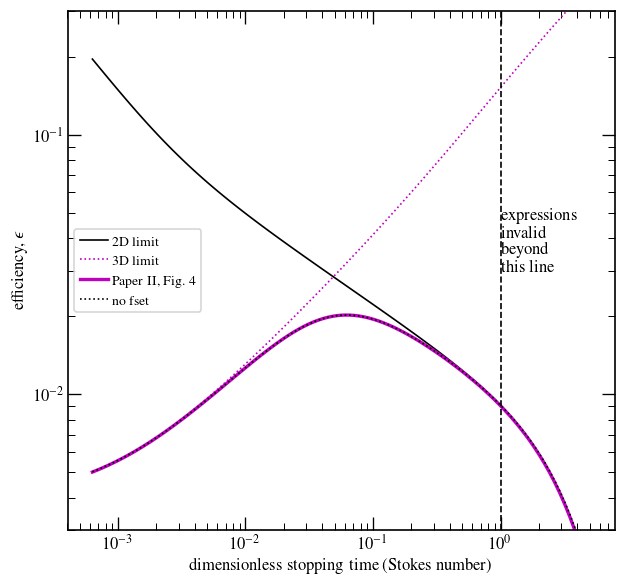

In [3]:
#Figure 4 of OL18
tauarr = 10**( np.linspace(-3.2,0.7,100) )

pars = {'tau':tauarr, 'qp':3e-7, 'eta':1e-3}

#the black solid line (2D, laminar)
eps2d = OL18.epsilon (**pars, mode='2dfset')

#add turbulent (3D) parameters
pars['hgas'] = 0.03
pars['alphaz'] = 1e-3 #try different values for different curves!

#the purple dotted lines (for alphaz=1e-3)
eps3d = OL18.epsilon (**pars, mode='3dset')

#the purple solid line as in the Paper (settling, 2d/3d mix, including fset)
#Note the nvec keyword, b/c in the paper turbulence only occurs in the z-direction
#the default is isotropic turbulence, where the planar rms-velocity components 
#are assumed to have the same value as the vertical
epsset = OL18.epsilon (**pars, nvec=(0,0,1), mode='setf')

#We also provide a convenience funtion for the settling epsilon without
#accounting for fset reduction factor
#epsset2 = OL18.eps_set (tauarr, 3e-7, 1e-3, 0.03, 1e-3)

#all effects (isotropic turbulence, ballistic+settling in 3D; not treated in Paper II)
#ballistic regime requires a planet radius normalized to semi-major axis
#numbers are virtually the same
epstot = OL18.epsilon (**pars, Rp=2.4e-5)

fg, ax = pl.subplots(figsize=(6,5), dpi=120)
fg.subplots_adjust(left=0.12, right=0.88, wspace=0.0, hspace=0.0, top=0.99)

ax.loglog(tauarr, eps2d, 'k-')
ax.loglog(tauarr, eps3d, 'm:')
ax.loglog(tauarr, epsset, 'm-', lw=2)
#ax.loglog(tauarr, epsset2, 'm--')
ax.loglog(tauarr, epstot, 'k:')
ax.legend(['2D limit', '3D limit', 'Paper II, Fig. 4', 'no fset', 'isotropic turb.'])
ax.axvline(1.0,ls='--')
ax.text(1.0,0.03,'expressions \n invalid\n beyond\n this line')
ax.set_ylim(0.003,0.3)
ax.set_xlabel('dimensionless stopping time (Stokes number)')
ax.set_ylabel('efficiency, $\epsilon$');

(2e-05, 0.2)

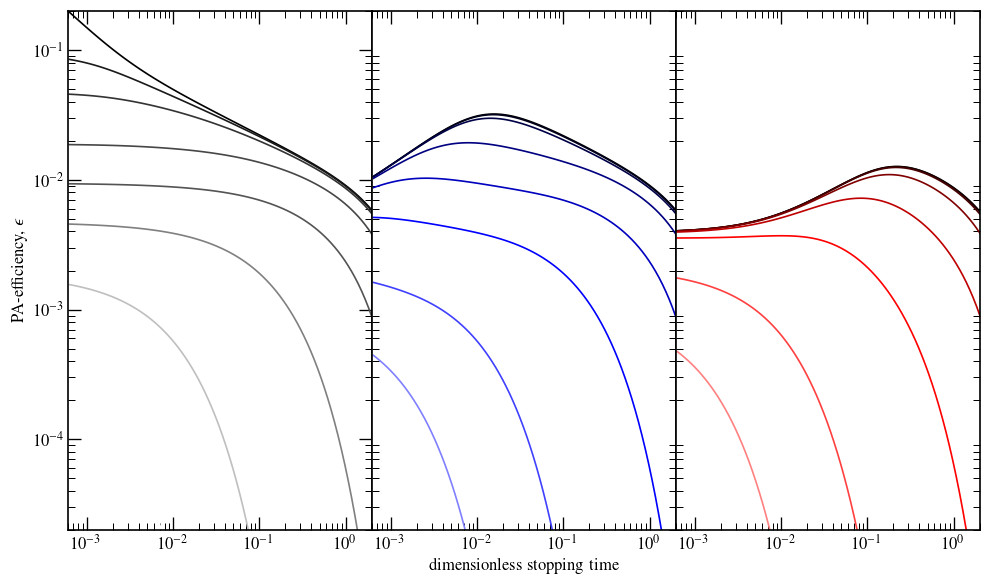

In [37]:
#Figure 7 of OL18
tauarr = 10**( np.linspace(-3.2,0.7,100) )

#list of inclinations and associated colors
ipList = [0., 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1]
rgbList0 = [(0,0,0), (0.1,0.1,0.1), (0.2,0.2,0.2), (0.28,0.28,0.28), (0.33,0.33,0.33), (0.5,0.5,0.5), (0.75,0.75,0.75), (1,1,1)]
rgbList4 = [(0,0,0), (0,0,0.1), (0,0,0.28), (0,0,0.5), (0,0,0.75), (0,0,1), (0.25,0.25,1), (0.5,0.5, 1)]
rgbList2 = [(0,0,0), (0.1,0,0), (0.28,0,0), (0.5,0,0), (0.75,0,0), (1,0,0), (1,0.25,0.25), (1,0.5, 0.5)]
Nip = len(ipList)

fg = pl.figure(figsize=(10,5), dpi=120)
fg.subplots_adjust(left=0.12, right=0.88, wspace=0.0, hspace=0.0, top=0.99)

ax = fg.add_subplot(131)
for k in range(Nip):
    epssetinc = OL18.epsilon (tau=tauarr, qp=3e-7, eta=1e-3, hgas=0.03, 
                                alphaz=0, ip=ipList[k], nvec=(0,0,1), mode='setf')
    ax.loglog(tauarr, epssetinc, '-', c=rgbList0[k], label='i = {:.}')
ax.set_xlim(6e-4, 2.)
ax.set_ylim(2e-5, 0.2)
ax.set_ylabel('PA-efficiency, $\epsilon$')

ax = fg.add_subplot(132)
for k in range(Nip):
    epssetinc = OL18.epsilon (tau=tauarr, qp=3e-7, eta=1e-3, hgas=0.03, 
                                alphaz=1e-4, ip=ipList[k], nvec=(0,0,1), mode='setf')
    ax.loglog(tauarr, epssetinc, '-', c=rgbList4[k], label='i = {:.}')
ax.set_yticks([])
ax.set_xlim(6e-4, 2.)
ax.set_ylim(2e-5, 0.2)
ax.set_xlabel('dimensionless stopping time');

ax = fg.add_subplot(133)
for k in range(Nip):
    epssetinc = OL18.epsilon (tau=tauarr, qp=3e-7, eta=1e-3, hgas=0.03, 
                                alphaz=1e-2, ip=ipList[k], nvec=(0,0,1), mode='setf')
    ax.loglog(tauarr, epssetinc, '-', c=rgbList2[k], label='i = {:.}')
ax.set_yticks([])
ax.set_xlim(6e-4, 2.)
ax.set_ylim(2e-5, 0.2)

0.2 0.9097167042113239


Text(0,0.5,'Embryo mass [Earth]')

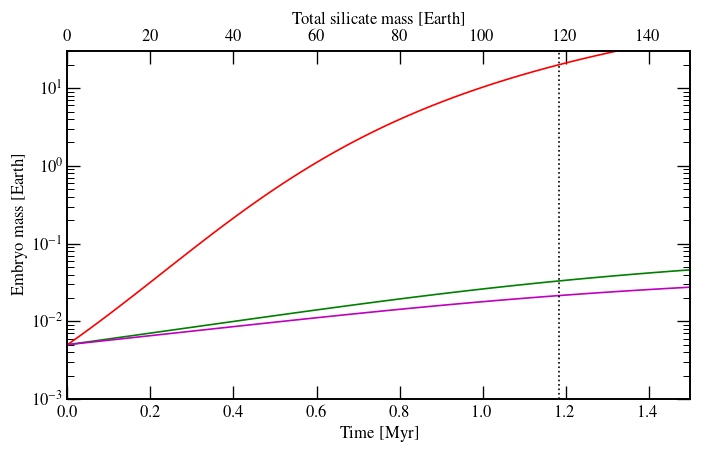

In [4]:
import scipy.integrate as sciint

def M_dot (Mpls, time): 
    
    epsarr = OL18.epsilon(qp=Mpls/cgs.mSun, tau=tauarr, hgas=hgas0, eta=eta0, alphaz=alphaT, mode='setf')
    
    #correction to avoid epsarr>1
    epsarr = 1 -np.exp(-epsarr)
     
    #fraction remaining from the original pebble flux    
    #this assumes decreasing radii
    ftot = np.cumprod(1-epsarr)
    
    #this cannot be negative
    ftot = np.maximum(0, ftot)
    
    fsil = (1-fsil_cross)*np.ones_like(rarr) *(rarr>=rice) +fsil_cross #silicate correction across iceline
    ftot = np.concatenate(([1],ftot[:-1])) *fsil #corrected such that ftot[0]==1 and accounting for iceline
    
    #what each embryo accretes
    dMdtarr = Mflux0 *ftot *epsarr
           
    return dMdtarr

#this reproduces Fig. 4 of Morbidelli et al. (2015) -- The great dichotomy of the Solar system
#our expressions may vary a bit, but we get the same result. In fact the dichotomy istronger

Nemb = 1*40 +1#Jupter +40 terrestrial embryos
Mflux0 = 2e-4*cgs.mEarth/cgs.yr #mass flux that Jupiter sees
Mpl0 = 5e-3 *cgs.mEarth #initial embryo mass 
alphaT = 1e-3 #turbulence stirring parameter (change to have some fun)
tau_ice = 10**-1.5 #Stokes number icy pebbles
tau_sil = 10**-2.5 #Stokes number silicates at iceline
rice = 3.5 #location iceline in AU
fsil_cross = 0.5 #fraction of the pebble flux that remains after acrossing iceline (silicate component)

#in Morbidelli+2015 these are being held fixed (in reality they may vary)
hgas0 = 0.05
eta0 = 0.0027


Mpls0 = Mpl0 *np.ones((Nemb))
rarr = np.linspace(1.001*rice,0.75,Nemb)
tauarr = tau_sil *(rarr/3.5)**0.5 #Morbidelli+2015 -- Stokes number scales as square-root of distance

#stopping time of pebbles beyond iceline
ix = rarr>rice
tauarr[ix] = tau_ice

#integration
tmax = 1.5e6*cgs.yr
tarr = np.linspace(0, tmax, 120)
out = sciint.odeint(M_dot, Mpls0, tarr)

Mplarr0 = out[:,0] #Jupiter
Mplarr1 = out[:,1] #first terrestrial embryo interior to iceline
MplarrN = out[:,Nemb-1] #last embryo

#total silicate mass (proxy for time)
Msiltot = tarr*Mflux0/2 /cgs.mEarth

fg = pl.figure(dpi=120)
fg.subplots_adjust(top=0.85, right=0.99)

axb = fg.add_subplot(111)
ax = axb.twiny()

ax.semilogy(Msiltot, Mplarr0/cgs.mEarth, c='r')
ax.semilogy(Msiltot, Mplarr1/cgs.mEarth, c='g')
ax.semilogy(Msiltot, MplarrN/cgs.mEarth, c='m')

axb.set_xlim(0,tarr.max()/cgs.yr/1e6)
ax.set_xlim(0,Msiltot.max())
ax.set_ylim(1e-3, ymax=30.)

#time when 20 Earth masses is reached; after that pebble isolation is reached
i0 = ((Mplarr0/cgs.mEarth-20)**2).argmin()
print(sum(Mpls0[1:])/cgs.mEarth, sum(out[i0][1:])/cgs.mEarth -sum(Mpls0[1:])/cgs.mEarth)
ax.axvline(Msiltot[i0], c='k', ls=':') 

axb.set_xlabel('Time [Myr]')
ax.set_xlabel('Total silicate mass [Earth]')
axb.set_ylabel('Embryo mass [Earth]')

Text(0,0.5,'Growth timescale [yr]')

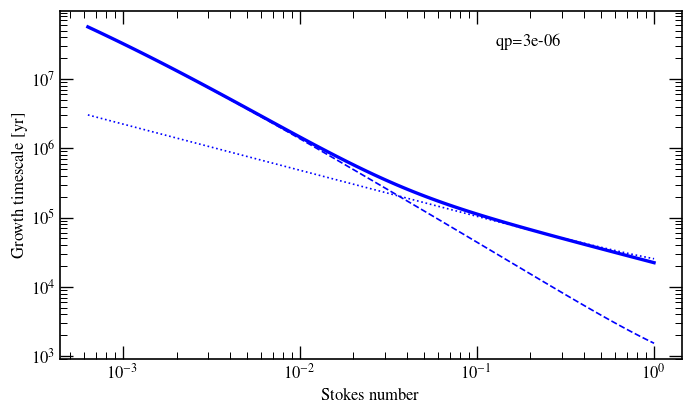

In [5]:
#R-implementations: can be used when surface density is known

tauarr = 10**( np.linspace(-3.2,0.,100) )
qp = 3e-6

#the R-implementation provides Mdot normalized by the local surface density
#Mdot = R(...) *r^2 \Omega \Sigma

#expressions below take \eta=0 as default
rval2D = OL18.rate_R(mode='2dsetf',tau=tauarr,qp=qp)
rval3D = OL18.rate_R(mode='3dsetf',tau=tauarr,qp=qp,hgas=0.05,alphaz=1e-3)
rval = OL18.rate_R(mode='set',tau=tauarr,qp=qp,hgas=0.05,alphaz=1e-3)

fg, ax = pl.subplots(1,1,dpi=120)
fg.subplots_adjust(top=0.85, right=0.99)

#convert "R" into a growth timescale
r0 = 10*cgs.au
Mstar = 2e33
Omega = 6.3e-9
Sigma = 0.1

tgr2D = qp*Mstar /(rval2D *r0**2 *Omega *Sigma)
tgr3D = qp*Mstar /(rval3D *r0**2 *Omega *Sigma)
tgr =   qp*Mstar /(rval   *r0**2 *Omega *Sigma)

ax.loglog(tauarr, tgr2D/cgs.yr, 'b:')
ax.loglog(tauarr, tgr3D/cgs.yr, 'b--')
ax.loglog(tauarr, tgr/cgs.yr, 'b-', lw=2.0)

ax.text(0.7,0.9,'qp='+str(qp),transform=ax.transAxes)

ax.set_xlabel('Stokes number')
ax.set_ylabel('Growth timescale [yr]')


(0.005, 5)

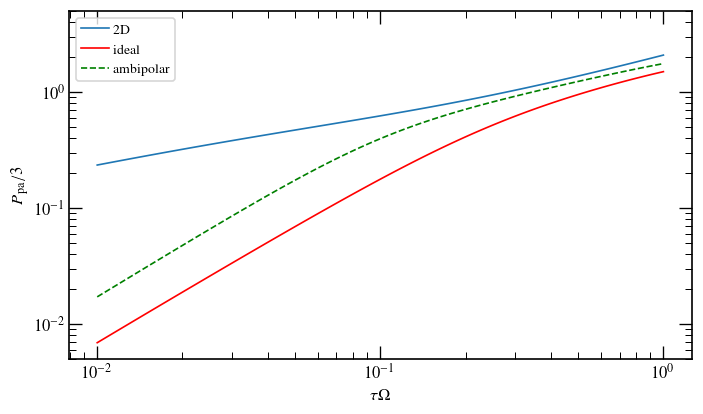

In [6]:
#Hill radii implementation -- Figure 9 OL18
hgas = 0.3 #dummy; outcome independent of this parameter
qp = 3e-3 *hgas**3
eta = 0.1*hgas
tauarr = 10**np.linspace(-2,0,100)
P2d = OL18.rate_P(mode='2dset',tau=tauarr,qp=qp,eta=eta)

#measured
alphazAD = 7.8e-4
alphazID = 4.4e-3

#midplane rms gas velocities provided by Ziyan Xu
sigIDarr = np.array([sqrt(2.57e-2), sqrt(3.26e-2), sqrt(1.21e-2)])*hgas
sigADarr = np.array([sqrt(2.19e-3), sqrt(6.05e-4), sqrt(3.39e-4)])*hgas

tcorrAD = alphazAD*hgas**2 /sigADarr[2]**2
tcorrID = alphazID*hgas**2 /sigIDarr[2]**2

hpAD = np.sqrt(alphazAD/tauarr) *hgas
hpID = np.sqrt(alphazID/tauarr) *hgas

#in the paper the notation is "k" (eqs. 42 OL18)
Pid = OL18.rate_P(mode='setf',tau=tauarr,qp=qp,eta=eta,
                       sigvec=sigIDarr,taucorr=tcorrID,hP=hpID)


Pad = OL18.rate_P(mode='setf',tau=tauarr,qp=qp,eta=eta,
                       sigvec=sigADarr,taucorr=tcorrAD,hP=hpAD)

fg, ax = pl.subplots(1,1,dpi=120)
fg.subplots_adjust(top=0.85, right=0.99)

#in OL18 these rates are divided by another factor 3
ax.loglog(tauarr, P2d/3)
ax.loglog(tauarr, Pid/3, c='r')
ax.loglog(tauarr, Pad/3, '--g')

ax.legend(['2D', 'ideal', 'ambipolar'])
ax.set_xlabel('$\\tau\Omega$')
ax.set_ylabel('$P_\\mathrm{pa}/3$')

ax.set_ylim(5e-3,5)